In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import bz2
from scipy.misc import imsave, imrotate



In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
from brian2.units import *
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib as mlib
mlib.rcParams.update({'font.size': 22})
mlib.rcParams.update({'errorbar.capsize': 5})

In [60]:
def load_compressed_spikes(name):
    fname = os.path.join(os.getcwd(), '%s.bz2'%name)
    print(fname)
    spikes = []
    with bz2.BZ2File(fname, 'rb') as f:
        for line in f:
            spl = line.split(' ')
            spikes.append((int(float(spl[0])), float(spl[1])))
            
        return spikes
    
def rowcol(indices,  row_bits=5, col_bits=5, chann_bits=1):
    '''from X | Y | P'''
    row = np.bitwise_and(
            np.right_shift(indices, chann_bits), ((1 << row_bits) - 1))
    col = np.bitwise_and(
            np.right_shift(indices, (row_bits + chann_bits)), ((1 << col_bits) - 1))
    print(np.unique(col))
    chn = np.bitwise_and(indices, ((1 << chann_bits) - 1))
    return row, col, chn


def split_in_spikes(spikes, row_bits=5, col_bits=5, chann_bits=1, width=32):
    rows, cols, chans = rowcol(np.array([np.uint32(i) for i, _ in spikes]), 
                               row_bits=row_bits, col_bits=col_bits, 
                               chann_bits=chann_bits)
#     print(rows, cols, chans)
    full_times = np.array([t for _, t in spikes])
    on_indices = np.where(chans == 1)[0]
    on_ids = rows[on_indices]*width + cols[on_indices]
    on_ts = full_times[on_indices]
    
    off_indices = np.where(chans == 0)[0]
    off_ids = rows[off_indices]*width + cols[off_indices]
    off_ts = full_times[off_indices]
    
    on_spks = sorted([[on_ids[i], on_ts[i]] for i in range(len(on_ts))], 
                     key=lambda x: x[1])
    off_spks = sorted([[off_ids[i], off_ts[i]] for i in range(len(off_ts))], 
                      key=lambda x: x[1])

    return on_spks, off_spks


def img_map(idx, width, n_per_coord=1):
    row = idx // (width*n_per_coord)
    col = (idx - row*width*n_per_coord) // n_per_coord
    return row, col


def spikes_to_images(on_spikes, off_spikes, width, height, n_per_coord=1, 
                     dt=11, cols=10):
    max_t = np.max([t for _, t in on_spikes])
    print "on_spikes length = ", len(on_spikes)
    if off_spikes is not None:
        max_t = max(max_t, np.max([t for _, t in off_spikes]))
        print "off_spikes length = ", len(off_spikes)
    max_t = int(max_t)
    
    img = np.zeros((height, width, 3))
    imgs = []
    start_t = 0
    on_start = 0
    off_start = 0
    for start_t in range(0, max_t, dt):
        end_t = start_t + dt
        for i, spike in enumerate(on_spikes[on_start:]):
            idx, t = spike
            if start_t <= t and t < end_t:
                row, col = img_map(idx, width, n_per_coord)
                img[row, col, 1] += 10.
            else:
                on_start += i
                break
        
        
        if off_spikes is not None:
            for j, spike in enumerate(off_spikes[off_start:]):
                idx, t = spike
                if start_t <= t and t < end_t:
                    row, col = img_map(idx, width, n_per_coord)
                    img[row, col, 0] += 10.
                else:
                    off_start += j
                    break
        

        imgs.append(img.copy())
        img[:] = 0.

    return imgs

In [61]:
# fname = './moving_bar_spikes/behave_SACCADE_pol_MERGED'\
# '_enc_TIME_thresh_13_hist_99_00_inh_False_at_70fps_64x64_res_spikes/'\
# 'spikes.txt'
# fname = 'spikes_EAST_32x32_200fps.txt'
# fname = 'spikes_SOUTH_32x32_200fps.txt'
fname = 'spikes_WEST_32x32_200fps.txt'

res = 32 # square => width==height
size_bits = int(np.ceil(np.log2(res))) # square => width==height
fps = 200.
dt_ms = int(1000./fps)
print(res, res, fps, size_bits, dt_ms)

spikes = load_compressed_spikes(fname)

spk_on, spk_off = split_in_spikes(spikes, row_bits=size_bits, col_bits=size_bits, chann_bits=1, 
                                  width=res)

imgs = spikes_to_images(spk_on, spk_off, res, res, dt=dt_ms)



(32, 32, 200.0, 5, 5)
C:\WinPython-64bit-2.7.9.4\notebooks\spikes_WEST_32x32_200fps.txt.bz2
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
on_spikes length =  60256
off_spikes length =  60160


In [62]:
spk_on

[[31, 7.0],
 [63, 7.0],
 [95, 7.0],
 [127, 7.0],
 [159, 7.0],
 [191, 7.0],
 [223, 7.0],
 [255, 7.0],
 [287, 7.0],
 [319, 7.0],
 [351, 7.0],
 [383, 7.0],
 [415, 7.0],
 [447, 7.0],
 [479, 7.0],
 [511, 7.0],
 [543, 7.0],
 [575, 7.0],
 [607, 7.0],
 [639, 7.0],
 [671, 7.0],
 [703, 7.0],
 [735, 7.0],
 [767, 7.0],
 [799, 7.0],
 [831, 7.0],
 [863, 7.0],
 [895, 7.0],
 [927, 7.0],
 [959, 7.0],
 [991, 7.0],
 [1023, 7.0],
 [30, 12.0],
 [62, 12.0],
 [94, 12.0],
 [126, 12.0],
 [158, 12.0],
 [190, 12.0],
 [222, 12.0],
 [254, 12.0],
 [286, 12.0],
 [318, 12.0],
 [350, 12.0],
 [382, 12.0],
 [414, 12.0],
 [446, 12.0],
 [478, 12.0],
 [510, 12.0],
 [542, 12.0],
 [574, 12.0],
 [606, 12.0],
 [638, 12.0],
 [670, 12.0],
 [702, 12.0],
 [734, 12.0],
 [766, 12.0],
 [798, 12.0],
 [830, 12.0],
 [862, 12.0],
 [894, 12.0],
 [926, 12.0],
 [958, 12.0],
 [990, 12.0],
 [1022, 12.0],
 [29, 17.0],
 [61, 17.0],
 [93, 17.0],
 [125, 17.0],
 [157, 17.0],
 [189, 17.0],
 [221, 17.0],
 [253, 17.0],
 [285, 17.0],
 [317, 17.0],
 [3

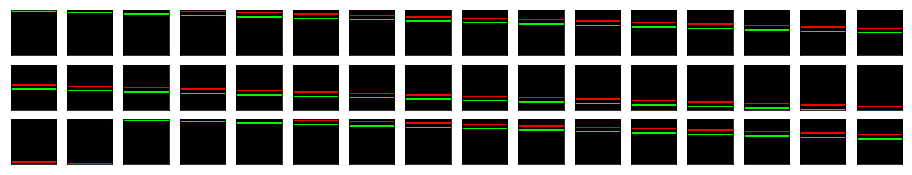

In [48]:
cols = 16
rows = len(imgs)//cols + int(len(imgs)%cols > 0)
fig = plt.figure(figsize=(cols, rows))
for i, img in enumerate(imgs):
    if i==48:
        break
    ax = plt.subplot(rows, cols, i+1)
    plt.imshow(img, interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [50]:
len(imgs)

2000

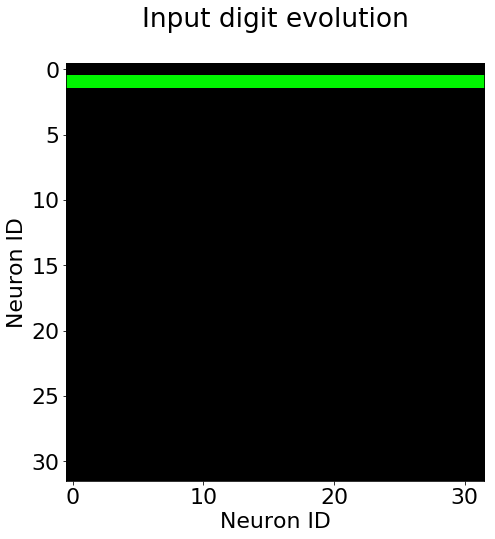

In [51]:
fig_conn, ax1 = plt.subplots(1, 1,figsize=(8,8))
    

ff_conn_ax = ax1.imshow(imgs[0])

ax1.set_title("Input digit evolution\n")
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
plt.tight_layout()
plt.show()

In [52]:
def init_conn():
#     line.set_data(input_rates/Hz)
#     ff_conn_ax.set_data(np.zeros((16,16)))
    return (ff_conn_ax, )

def animate_conn(i):
    global imgs
    
    ff_conn_ax.set_data(imgs[i])
    return (ff_conn_ax,)

In [53]:
anim_conn = animation.FuncAnimation(fig_conn, animate_conn, init_func=init_conn,
                               frames=len(imgs), 
                            interval=5, blit=True)

In [55]:
HTML(anim_conn.to_html5_video())

In [54]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=60, metadata=dict(artist='Petrut A Bogdan'), bitrate=-1)
anim_conn.save('drifting_grating_south.mp4', writer=writer)